## London Bike Sharing Analysis

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing London Bike Sharing Dataset
df = pd.read_csv("london_merged.csv")

In [3]:
# 1st five rows of dataset
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
# last 5 rows of dataset
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


The columns in the Bike Share London dataset represent the following:

- `timestamp`: The date and time when the data was recorded.
- `count`: The number of bikes rented at that particular timestamp.
- `c_temp`: The temperature in Celsius at that particular timestamp.
- `f_temp`: The temperature Feels like at that particular timestamp.
- `humidity`: The humidity level at that particular timestamp.
- `wind_speed`: The wind speed at that particular timestamp.
- `weather_code`: A code representing the weather condition at that particular timestamp.{1:Clear,2:scattered Clouds,3:Broken clouds,4:Cloudy,7:Rain,10:Rain with thunderstorm,26:snowfall,94:Freezing Fog}
- `is_holiday`: A binary value indicating whether the day is a holiday or not (1 for holiday, 0 for non-holiday).
- `is_weekend`: A binary value indicating whether the day is a weekend or not (1 for weekend, 0 for non-weekend).
- `season`: A value representing the season at that particular timestamp {0 : Spring , 1 : Summer , 2 : Autumn , 3 : Winter}.

## Exploratory Data Analysis (EDA)

In [5]:
# Rows and Columns of the Dataset
rows,columns = df.shape
print("The number of rows in the Dataset are : {} and number of columns in the Dataset are {}".format(rows,columns))

The number of rows in the Dataset are : 17414 and number of columns in the Dataset are 10


In [6]:
# Names of the columns
print(df.columns)

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [7]:
# Rename the names of some Columns
df.rename(columns={'cnt':'count','t1':'c_temp','t2':'f_temp','hum':'humidity'},inplace=True)
print(df.columns)

Index(['timestamp', 'count', 'c_temp', 'f_temp', 'humidity', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [68]:
# Missing Values 
df.isnull().sum()

timestamp       0
count           0
c_temp          0
f_temp          0
humidity        0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
# Highest Number of Bike counts at a particular time stamp

highest_count = df['count'].max()
print(f"Highest number of bike counts at a particular TimeStamp is : {highest_count}")

Highest number of bike counts at a particular TimeStamp is : 7860


In [69]:
# Count the bike rides per season
grouped_seasons = df.groupby(['season'])['count'].count().reset_index()
grouped_seasons

,season,count
0,0.0,4394
1,1.0,4387
2,2.0,4303
3,3.0,4330


In [90]:
# Daily Average Bike Shares Per season
grouped_seasons_avg = (df.groupby(['season'])['count'].mean())*24 # multiplied by 24 to get daily average
grouped_seasons_avg

season
0.0    26491.958125
1.0    35147.165717
2.0    28294.901232
3.0    19721.498383
Name: count, dtype: float64

In [91]:
# The number of Bike shares when the weather is hottest
hottest_temp_count = df.loc[df['c_temp'].idxmax(),'count']
print(f"The Number of Bike Shares when the Temperature is Hottest are : {hottest_temp_count}")

The Number of Bike Shares when the Temperature is Hottest are : 4617


In [26]:
# The Number of Bike shares when the Weather is coldest

coldest_day_count = df.loc[df['c_temp'].idxmin(), 'count']
print(f"The number of Bike Shares when the Temperature is Coldest are : {coldest_day_count}")

The number of Bike Shares when the Temperature is Coldest are : 426


In [36]:
# The number of Bike shares when the Wind speed is highest
highest_speed_count = df.loc[df['wind_speed'].idxmax(),'count']
print(f"The Number of Bike Shares when the Wind Speed is highest are : {highest_speed_count}")

The Number of Bike Shares when the Wind Speed is highest are : 644


In [55]:
# Lowest Number of Bike Shares in Winter
winters = df[df['season']==3.0]
lowest_count_winter = winters.loc[winters['count'].idxmin(),'count']
print(f"The Lowest Number of Bike Shares in Winter Season are : {lowest_count_winter}")

The Lowest Number of Bike Shares in Winter Season are : 10


In [56]:
# Highest Number of Bike share in autumn or Fall

autumn = df[df['season']==2.0]
highest_count_autumn = autumn.loc[autumn['count'].idxmax(),'count']
print(f"The Highest Number of Bike Shares in Autumn Season are : {highest_count_autumn}")

The Highest Number of Bike Shares in Autumn Season are : 5422


In [67]:
# Average Humidity in Spring
spring = df[df['season']==0]
avg_humidity = round(spring['humidity'].mean(),2)
print(f"The Average Humidity in Spring is : {avg_humidity}")

The Average Humidity in Spring is : 68.6


## Visualization

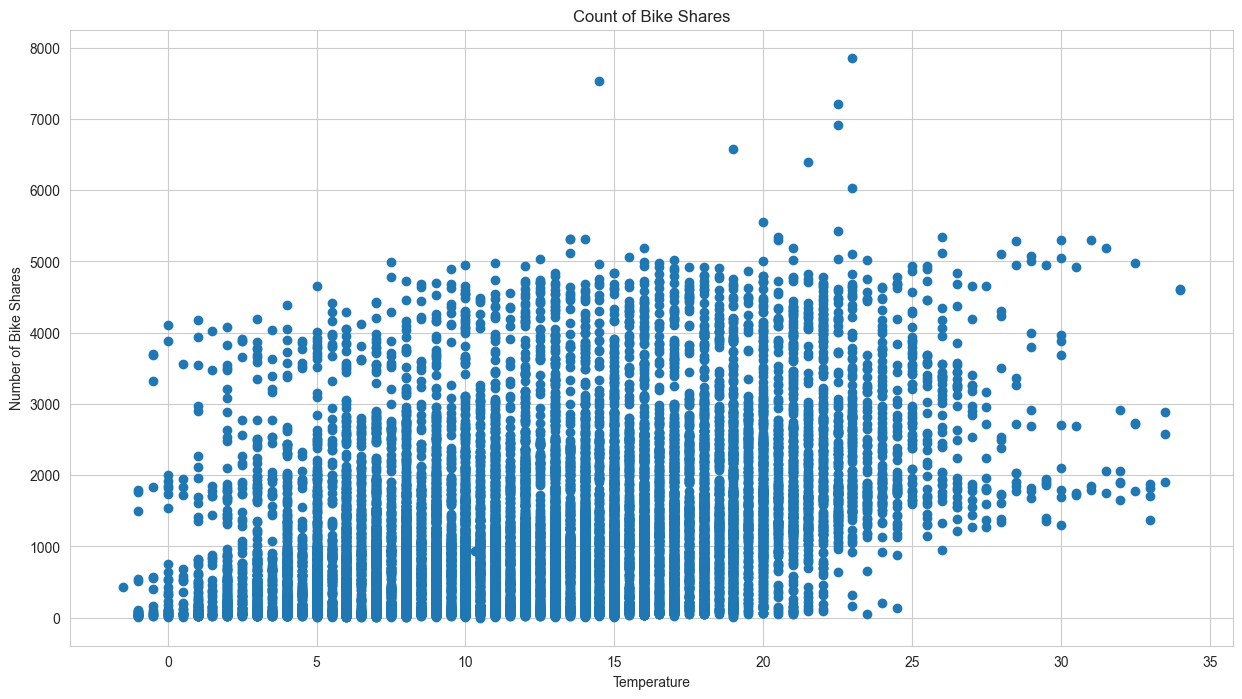

In [83]:
# Scatter plot to show the number of bike shares w.r.t temprature

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.scatter(df['c_temp'],df['count'])
plt.xlabel("Temperature")
plt.ylabel("Number of Bike Shares")
plt.title("Count of Bike Shares")
plt.show()

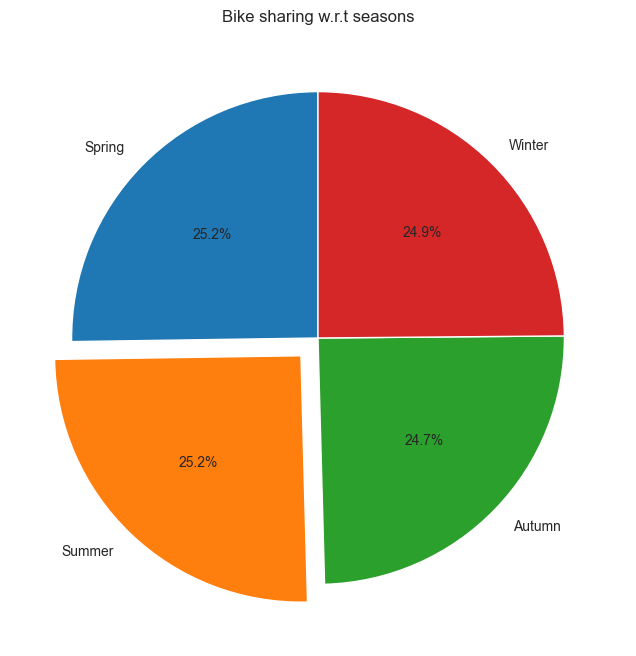

In [93]:
# Pie chart to show the distribution of Bike shares w.r.t seasons
grouped_seasons
sns.set_style("whitegrid")
plt.figure(figsize=(14,8))
plt.pie(grouped_seasons['count'], labels=['Spring','Summer','Autumn','Winter'], autopct='%1.1f%%', startangle=90,explode=[0,0.1,0,0])
plt.title('Bike sharing w.r.t seasons')
plt.show()